<a href="https://colab.research.google.com/github/ANUS-TUP/-FUTURE_DS_01-/blob/main/Socialmedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

In [55]:
# Load Dataset and show rows.
df=pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


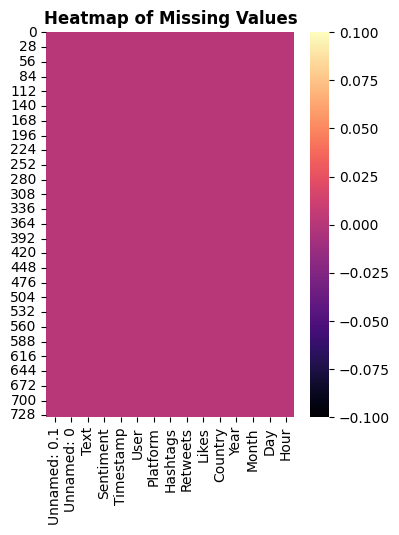

In [5]:
# Visualize missing values using heatmap
plt.figure(figsize=(4, 5))
sns.heatmap(df.isnull(), cmap="magma")
plt.title("Heatmap of Missing Values", weight='bold')
plt.show()

In [6]:
# Clean Data (Drop unnecessary columns)
df=df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], errors="ignore")
print(df.columns.tolist())

['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


In [7]:
# Sentiment Count
sentiment_counts=df["Sentiment"].value_counts()
print(sentiment_counts)

Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64


In [10]:
#Most Use Hashtags
hashtags=df["Hashtags"].dropna().str.split()
hashtags_flat=[tag for sublist in hashtags for tag in sublist]
hashtags_counter=Counter(hashtags_flat)

Most_Use_hashtags=pd.Series(dict(hashtags_counter)).sort_values(ascending=False).head(10)
print(Most_Use_hashtags)

#Serenity       15
#Gratitude      13
#Excitement     13
#Nostalgia      11
#Despair        11
#Curiosity      10
#Contentment    10
#Hopeful         9
#Awe             9
#Grief           9
dtype: int64


In [11]:
#  Most Liked Posts
print(df.nlargest(10, "Likes")[["Text", "Likes"]])

                                                  Text  Likes
335  Thrilled to witness the grandeur of a cultural...   80.0
345  Motivated to achieve fitness goals after an in...   80.0
355  Anticipation for an upcoming adventure in an e...   80.0
368  Elation over discovering a rare book in a quai...   80.0
382  A sense of wonder at the vastness of the cosmo...   80.0
402  Awe-inspired by the vastness of the cosmos on ...   80.0
432  Heartache deepens, a solitary journey through ...   80.0
470  Dancing on sunshine, each step a celebration o...   80.0
481  Surrounded by the colors of joy, a canvas pain...   80.0
510  At the front row of Adele's concert, each note...   80.0


In [18]:
# Average Likes and Retweets per Sentiment
print(df.groupby("Sentiment")[["Likes", "Retweets"]].mean())

                      Likes   Retweets
Sentiment                             
Acceptance        35.000000  17.333333
Acceptance        33.600000  16.800000
Accomplishment    51.666667  26.000000
Admiration        45.000000  22.000000
Admiration        40.000000  20.000000
...                     ...        ...
Wonder            80.000000  40.000000
Wonder            80.000000  40.000000
Wonderment        70.000000  35.000000
Yearning          20.000000  10.000000
Zest              31.000000  15.500000

[279 rows x 2 columns]


In [15]:
# Filter out Tweets by Sentiment
positive_tweets=df[df["Sentiment"].str.strip()=="Positive"]
negative_tweets=df[df["Sentiment"].str.strip()=="Negative"]
neutral_tweets=df[df["Sentiment"].str.strip()=="Neutral"]

In [13]:
positive_tweets.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14


In [16]:
negative_tweets.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
11,Feeling a bit under the weather today. ...,Negative,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10
19,Winter blues got me feeling low. ...,Negative,2023-01-20 15:15:00,WinterBlues,Instagram,#WinterBlues #Mood,8.0,15.0,USA,2023,1,20,15


In [17]:
neutral_tweets.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12
14,Technology is changing the way we live. ...,Neutral,2023-01-19 09:45:00,TechEnthusiast,Twitter,#Tech #Innovation,15.0,30.0,India,2023,1,19,9
18,Attending a virtual conference on AI. ...,Neutral,2023-01-20 11:30:00,TechConference,Facebook,#AI #TechConference,25.0,50.0,USA,2023,1,20,11
704,Trying out a new study technique for upcoming ...,Neutral,2023-10-02 16:45:00,StudyTechniqueExperimentHighSchool,Instagram,#StudyStrategies #HighSchoolExams,23.0,42.0,USA,2023,10,2,16


In [19]:
# Top Users and Platforms
print(df["User"].value_counts().head(5))  # Top 5 users
print(df["Platform"].value_counts())      # Most used platforms

User
WinterWarmth        3
RainNurturer        3
PeakConqueror       3
DawnGardener        3
CarnivalDreamer     3
Name: count, dtype: int64
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64


In [22]:
# Sentiment Trends Over Hour,Day,Month,Year
sentiment_trends=df.groupby(["Hour","Day", "Month","Year"])["Sentiment"].value_counts().unstack()
sentiment_trends.head()

Sentiment            Acceptance     Acceptance        Accomplishment   \
Hour Day Month Year                                                     
0    20  1     2023            NaN               NaN              NaN   
2    12  5     2022            NaN               NaN              NaN   
3    7   1     2023            NaN               NaN              NaN   
     19  9     2019            NaN               NaN              NaN   
5    15  4     2020            NaN               NaN              1.0   

Sentiment            Admiration   Admiration     Admiration      \
Hour Day Month Year                                               
0    20  1     2023          NaN            NaN             NaN   
2    12  5     2022          NaN            NaN             NaN   
3    7   1     2023          NaN            NaN             NaN   
     19  9     2019          NaN            NaN             NaN   
5    15  4     2020          NaN            NaN             NaN   

Sentiment            Adoration      Adrenaline       Adventure   \
Hour Day Month Year                                               
0    20  1     2023            NaN              NaN         NaN   
2    12  5     2022            NaN              NaN         NaN   
3    7   1     2023            NaN              NaN         NaN   
     19  9     2019            NaN              NaN         NaN   
5    15  4     2020            NaN              NaN         NaN   

Sentiment            Affection      ...  Vibrancy   Whimsy          \
Hour Day Month Year                 ...                              
0    20  1     2023            NaN  ...        NaN             NaN   
2    12  5     2022            NaN  ...        NaN             NaN   
3    7   1     2023            NaN  ...        NaN             NaN   
     19  9     2019            NaN  ...        NaN             NaN   
5    15  4     2020            NaN  ...        NaN             NaN   

Sentiment            Whispers of the Past   Winter Magic   Wonder   \
Hour Day Month Year                                                  
0    20  1     2023                    NaN            NaN      NaN   
2    12  5     2022                    NaN            NaN      NaN   
3    7   1     2023                    NaN            NaN      NaN   
     19  9     2019                    NaN            NaN      NaN   
5    15  4     2020                    NaN            NaN      NaN   

Sentiment            Wonder       Wonder         Wonderment      Yearning   \
Hour Day Month Year                                                          
0    20  1     2023          NaN            NaN             NaN        NaN   
2    12  5     2022          NaN            NaN             NaN        NaN   
3    7   1     2023          NaN            NaN             NaN        NaN   
     19  9     2019          NaN            NaN             NaN        NaN   
5    15  4     2020          NaN            NaN             NaN        NaN   

Sentiment            Zest   
Hour Day Month Year         
0    20  1     2023    NaN  
2    12  5     2022    NaN  
3    7   1     2023    NaN  
     19  9     2019    NaN  
5    15  4     2020    NaN  

[5 rows x 279 columns]

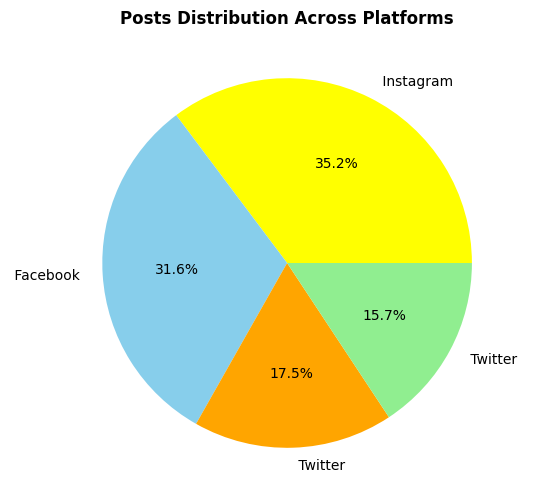

In [21]:
# Posts per Platform
plt.figure(figsize=(6,6))
df["Platform"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["yellow", "skyblue", "orange", "lightgreen"])
plt.title("Posts Distribution Across Platforms", fontweight='bold')
plt.ylabel("")
plt.show()

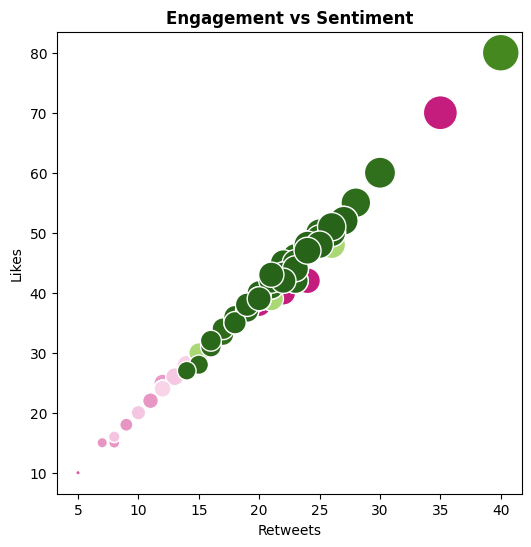

In [24]:
# Engagement vs Sentiment
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Retweets", y="Likes", hue="Sentiment", size=df["Likes"] + df["Retweets"], sizes=(10, 700), data=df, palette="PiYG", legend=False)
plt.title("Engagement vs Sentiment", weight='bold')
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.show()

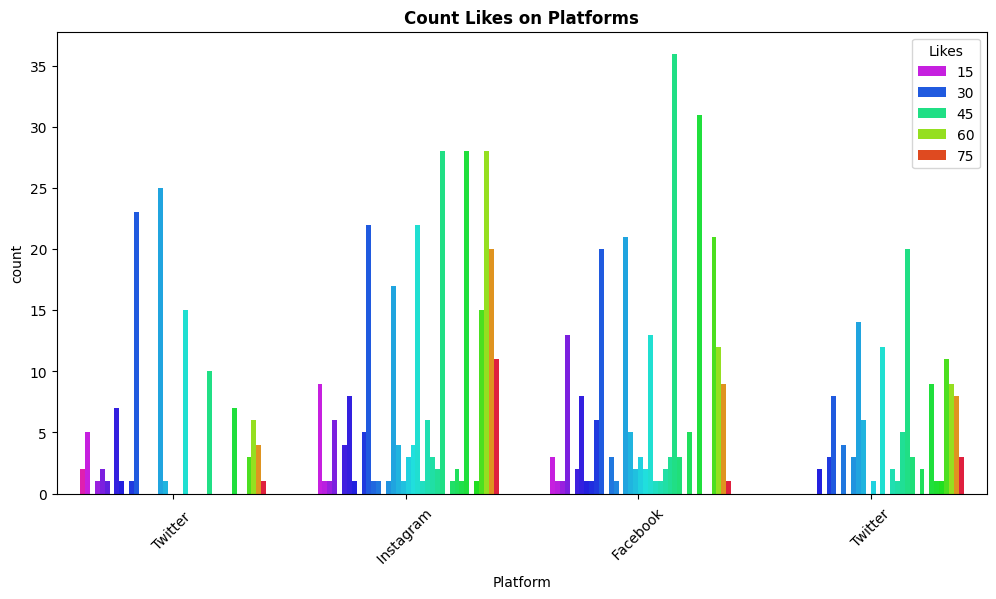

In [27]:
# Visualization of Likes on Different Platforms
plt.figure(figsize=(12,6))
sns.countplot(x="Platform", data=df, hue="Likes", palette="gist_rainbow_r")
plt.title("Count Likes on Platforms", fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

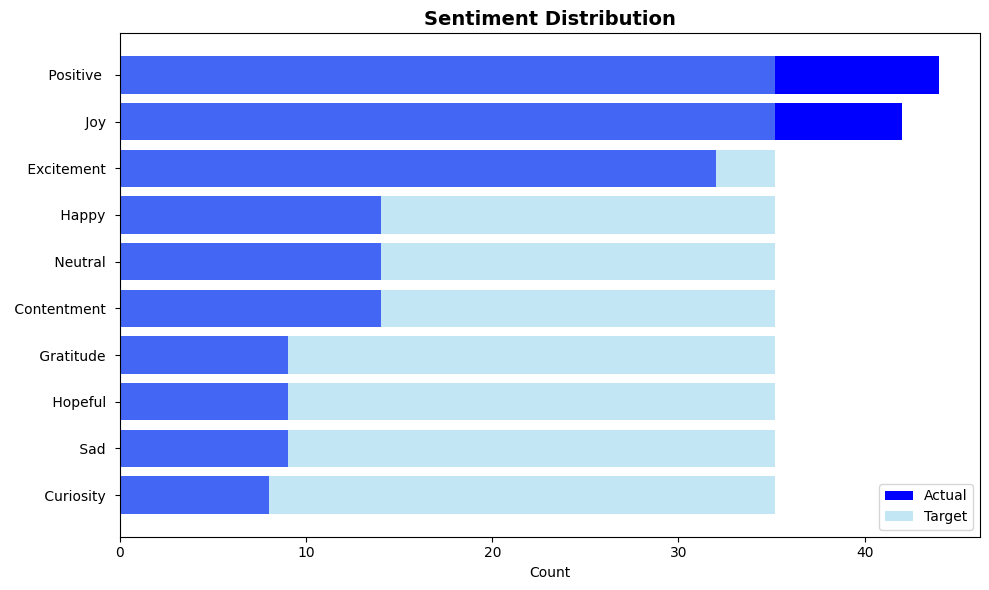

In [26]:
#  Sentiment Count with Target
sentiment_counts_sorted=sentiment_counts.sort_values(ascending=True).tail(10)
targets=[sentiment_counts_sorted.max() * 0.8] * len(sentiment_counts_sorted)

fig, ax=plt.subplots(figsize=(10, 6))
ax.barh(sentiment_counts_sorted.index, sentiment_counts_sorted.values, color="blue", label="Actual")
ax.barh(sentiment_counts_sorted.index, targets, color="skyblue", alpha=0.5, label="Target")
ax.set_xlabel("Count")
ax.set_title("Sentiment Distribution", fontsize=14, weight='bold')
ax.legend()
plt.tight_layout()
plt.show()

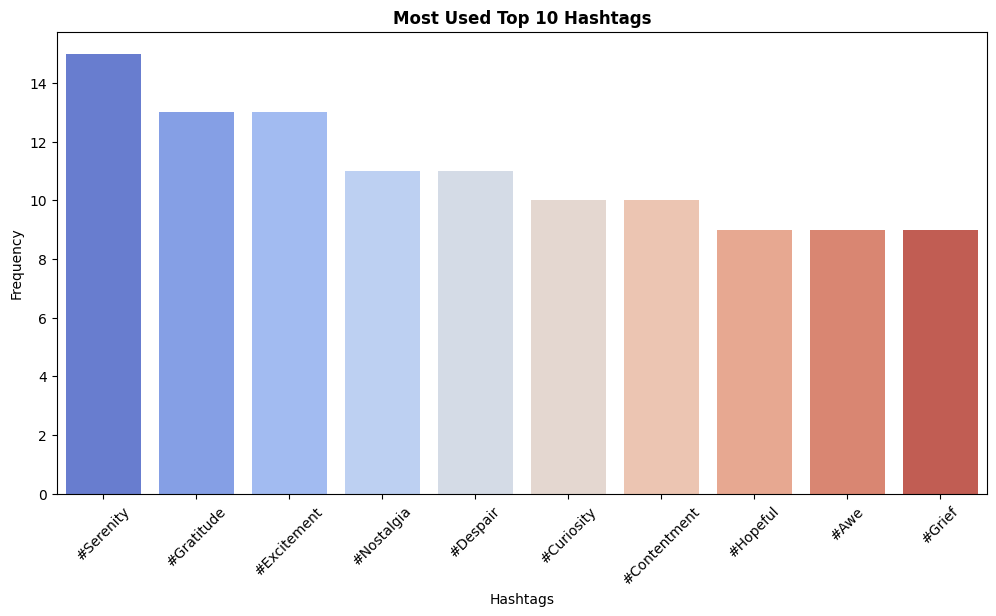

In [31]:
# Most Used Hashtags
plt.figure(figsize=(12,6))
# Corrected the variable names to Most_Use_hashtags
sns.barplot(x=Most_Use_hashtags.index, y=Most_Use_hashtags.values, hue=Most_Use_hashtags.index, palette="coolwarm", legend=False)
plt.title("Most Used Top 10 Hashtags", fontweight='bold')
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

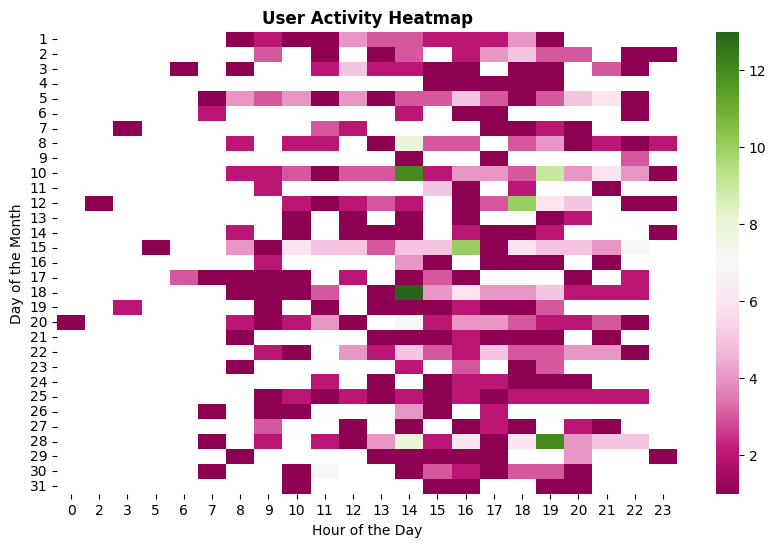

In [33]:
#  User Activity Using Heatmap
activity_pivot=df.pivot_table(index="Day", columns="Hour", values="User", aggfunc="count")
plt.figure(figsize=(10,6))
sns.heatmap(activity_pivot, cmap="PiYG", annot=False)
plt.title("User Activity Heatmap", weight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Month")
plt.show()

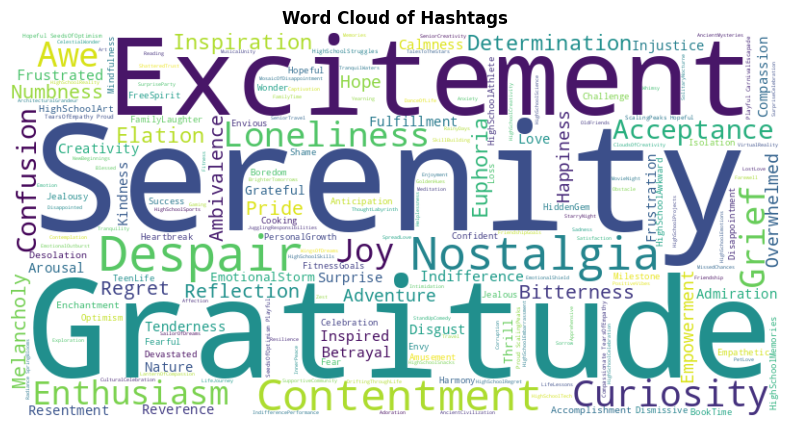

In [38]:
# Create a WordCloud of all Hashtags
all_hashtags = " ".join(df['Hashtags'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags', weight='bold')
plt.show()

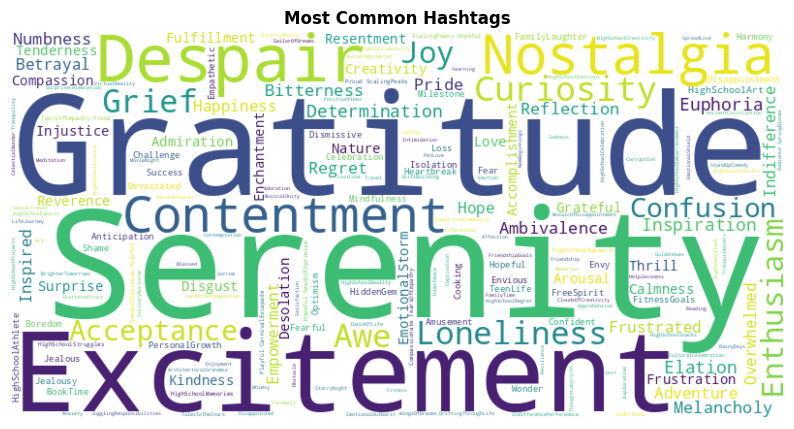

In [46]:
# Most Common Hashtags
wordcloud=WordCloud(width=800, height=400, background_color="white").generate(" ".join(hashtags_flat))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Hashtags", weight='bold')
plt.show()

# Add a 'cleaned_text' column for text analysis
# In a real scenario, you would perform more robust cleaning here (e.g., removing punctuation, stop words)
df['cleaned_text'] = df['Text'].astype(str)

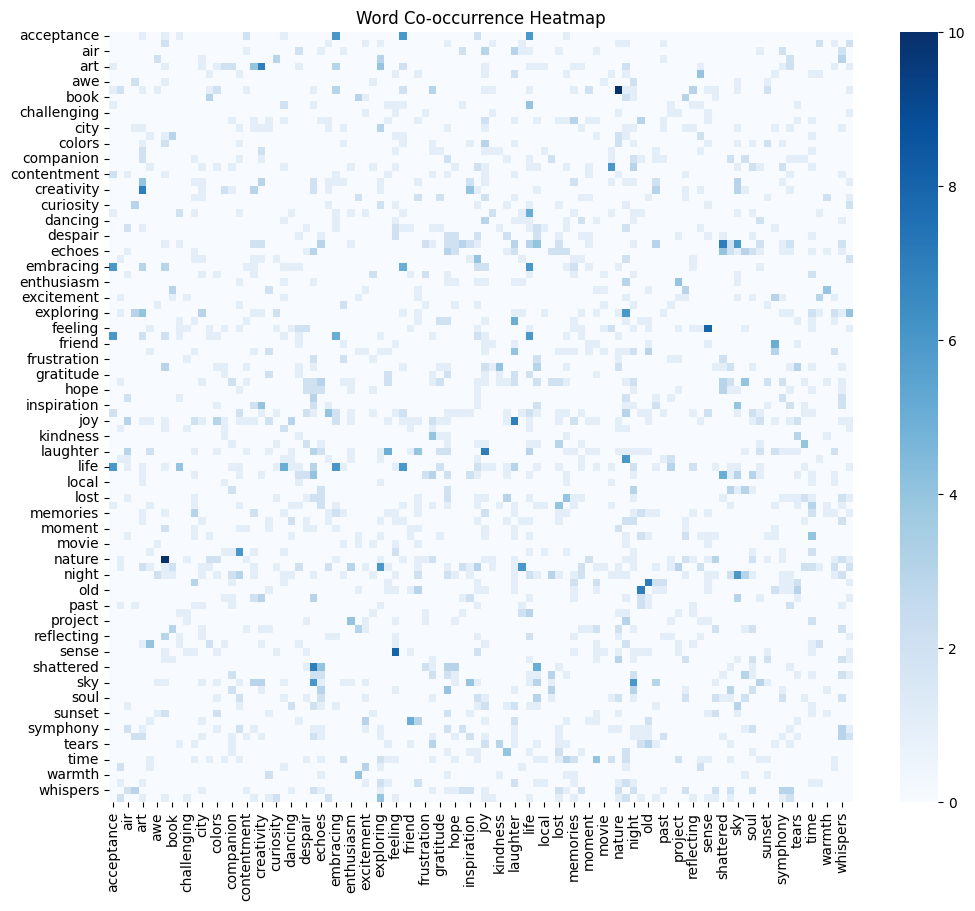

In [44]:
# Word co-occurrence heatmap
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
Xc = (X.T @ X)
Xc.setdiag(0)

df_cooc = pd.DataFrame(Xc.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(12, 10))
sns.heatmap(df_cooc, cmap='Blues')
plt.title('Word Co-occurrence Heatmap')
plt.show()

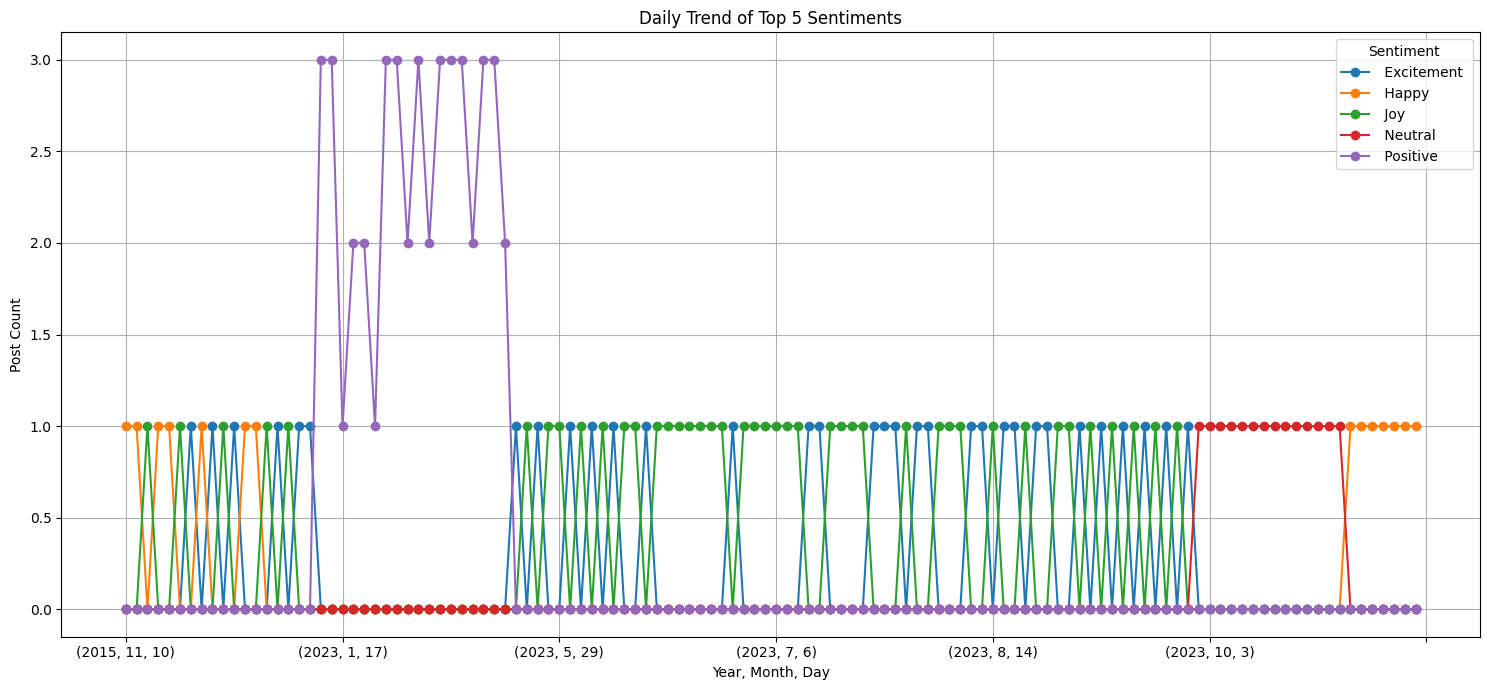

In [48]:
# Daily Sentiment Trend (Top 5)
top_5 = df['Sentiment'].value_counts().nlargest(5).index
trend_df = df[df['Sentiment'].isin(top_5)]

# Group by Day, Month, and Year to represent a specific day
trend_pivot = trend_df.groupby(['Year', 'Month', 'Day', 'Sentiment']).size().unstack().fillna(0)

# Since the x-axis will be composite (Year, Month, Day), you might want to adjust how you plot
# For simplicity, you can plot directly, but the x-axis labels might be long.
# A more advanced approach would be to create a proper datetime index if possible.
trend_pivot.plot(marker='o', figsize=(15, 7)) # Increased figure size for better readability
plt.title("Daily Trend of Top 5 Sentiments")
plt.ylabel("Post Count")
plt.xlabel("Year, Month, Day") # Update label
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

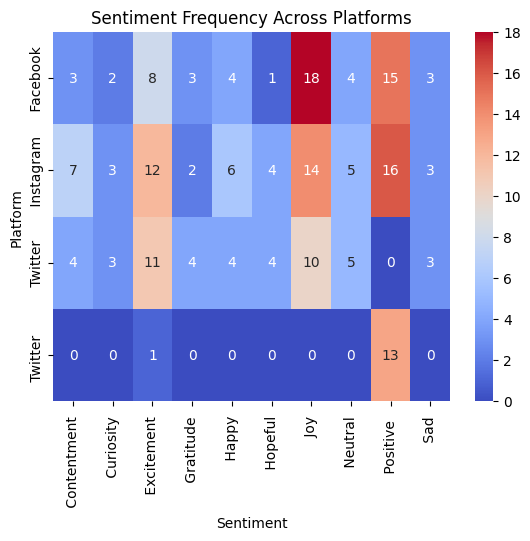

In [49]:
# Sentiment Heatmap Across Platforms (Top 10 Sentiments)
top_10_sent = df['Sentiment'].value_counts().nlargest(10).index
heat_df = df[df['Sentiment'].isin(top_10_sent)].groupby(['Platform', 'Sentiment']).size().unstack().fillna(0)
sns.heatmap(heat_df, annot=True, fmt='g', cmap='coolwarm')
plt.title("Sentiment Frequency Across Platforms")
plt.show()